In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
from torch.autograd import Variable

import os

from UNet import UNet

In [2]:
luna_root = '/deep/group/shubhang/luna16/'
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

experiment_name = 'train11'

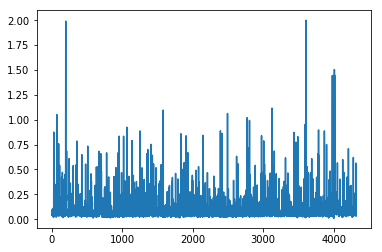

In [3]:
losses_file = 'losses/' + experiment_name + '.npy'
losses = np.load(losses_file)
plt.plot(np.arange(losses.shape[0]), np.clip(losses, 0, 2))
plt.show()

In [4]:
unet = UNet()
unet.load('ckpts/' + experiment_name + '_ckpt')

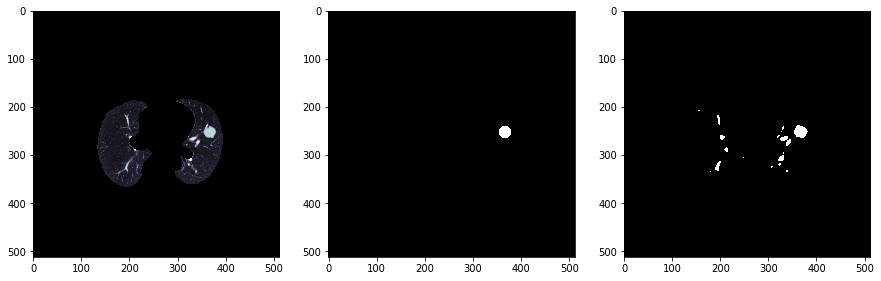

In [6]:
rand_id = '487268565754493433372433148666_10.npy'
img, target = np.load(luna_root + '/lungs_overfit/' + rand_id), np.load(luna_root + '/gt_overfit/' + rand_id)
pred = unet.pred(Variable(torch.from_numpy(img.reshape(1, *img.shape)).type(dtype))).cpu().data.numpy() > 0.5

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(np.squeeze(img), cmap=plt.cm.bone)
axes[1].imshow(np.squeeze(target), cmap=plt.cm.bone)
axes[2].imshow(np.squeeze(pred), cmap=plt.cm.bone)
plt.show()

In [6]:
import sklearn.metrics as metrics

f1 = metrics.f1_score(target.reshape(-1), pred.reshape(-1), average='binary')
f1

0.68168168168168164

In [7]:
prec = metrics.precision_score(target.reshape(-1), pred.reshape(-1), average='binary')
recall = metrics.recall_score(target.reshape(-1), pred.reshape(-1), average='binary')
prec, recall

(0.5732323232323232, 0.84074074074074079)

In [24]:
ids = os.listdir(luna_root + 'lungs')
cid = ids[0]
img, target = np.load(luna_root + 'lungs/' + cid), np.load(luna_root + 'gt/' + cid)

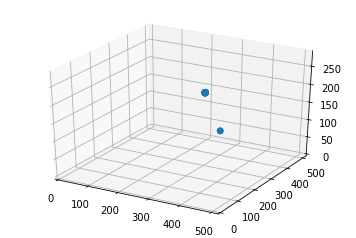

In [25]:
z, x, y = np.where(target == 1)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlim([0,512])
ax.set_ylim([0,512])
ax.set_zlim([0,286])

plt.show()

In [27]:
pred_scan = []
for ct_slice in img:
    pred = unet.pred(Variable(torch.from_numpy(ct_slice.reshape(1, 1, *ct_slice.shape)).type(dtype))).cpu().data.numpy()
    pred = np.squeeze(pred > 0.9)
    pred_scan.append(pred)

pred_scan = np.array(pred_scan)

In [ ]:
z, x, y = np.where(pred_scan == 1)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlim([0,512])
ax.set_ylim([0,512])
ax.set_zlim([0,286])

plt.show()

In [29]:
prec = metrics.precision_score(target.reshape(-1), pred_scan.reshape(-1), average='binary')
recall = metrics.recall_score(target.reshape(-1), pred_scan.reshape(-1), average='binary')
f1 = 2 * (prec * recall) / (prec + recall)
prec, recall, f1

(0.00077401428949457529, 0.66857142857142859, 0.0015462384775498067)

In [17]:
f1 = 2 * (prec * recall) / (prec + recall)
f1

0.00082112450840572193